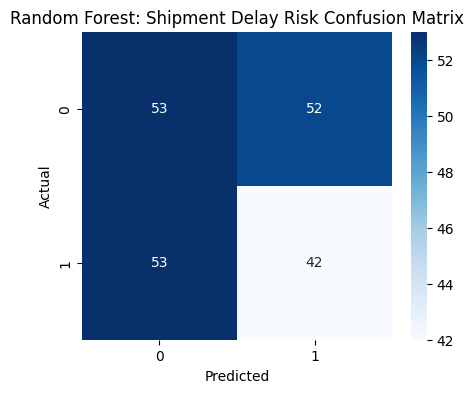

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       105
           1       0.45      0.44      0.44        95

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



In [1]:
#Random Forest (Classification + Matplotlib Confusion Matrix)
#Scenario: Classify the risk of shipment delays (High vs. Low) based on shipping distance, carrier reliability, etc.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. SYNTHETIC DATA CREATION
X = np.random.rand(1000, 5)  # [distance, carrier_rating, product_type, warehouse_cap, seasonality]
y = np.random.randint(0, 2, 1000)  # 0 = Low delay risk, 1 = High delay risk

df = pd.DataFrame(X, columns=['distance','carrier_rating','product_type','warehouse_cap','seasonality'])
df['delay_risk'] = y

# 2. TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('delay_risk', axis=1),
    df['delay_risk'],
    test_size=0.2,
    random_state=42
)

# 3. MODEL TRAINING
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# 4. PREDICTION
y_pred = rf_model.predict(X_test)

# 5. VISUALIZATION: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Random Forest: Shipment Delay Risk Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))